<a href="https://colab.research.google.com/github/Naveen148/Naveen-M/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [45]:
import pandas as pd

import matplotlib as plt
import seaborn as sns

**Importing the dataset**

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.shape

(400, 5)

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [7]:
df1=pd.get_dummies(df)

In [32]:
df1.head(10)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
5,27,58000,0,0,1
6,27,84000,0,1,0
7,32,150000,1,1,0
8,25,33000,0,0,1
9,35,65000,0,1,0


In [9]:
del df1['User ID']

In [10]:
df1.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


**Splitting the dataset into the Training set and Test set**

In [33]:
x=df1[['Age','EstimatedSalary','Gender_Female','Gender_Male']].values
y=df1['Purchased'].values

**Feature Scaling**

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Fitting Decision Tree Classification to the Training set**

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(x_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels


DecisionTreeClassifier()

**Predicting the Test set results**

In [36]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

**Making the Confusion Matrix**

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(x_test) 



acc = roc_auc_score(y_train, dt.predict(x_train))
print("Train set AUC : ", acc)


Train set AUC :  0.9957983193277311


In [38]:
import matplotlib.pyplot as plt

**Visualising the Training set results**

In [39]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(x,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (x,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    x: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(x, pd.DataFrame):
        raise Exception('''x has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(x.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(x.columns[0])
        if i == 0:
            ax[i].set_ylabel(x.columns[1])
            ax[i].set_ylim(x.values[:,1].min(), x.values[:,1].max())
            ax[i].set_xlim(x.values[:,0].min(), x.values[:,0].max())
    plt.tight_layout()

In [29]:
df1.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [48]:
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=2)

dt.fit(x_train, y_train)




DecisionTreeClassifier(max_depth=2)

**Visualising the Test set results**

[Text(0.5, 0.8333333333333334, 'X[0] <= 41.5\ngini = 0.467\nsamples = 320\nvalue = [201, 119]'),
 Text(0.25, 0.5, 'X[1] <= 90500.0\ngini = 0.265\nsamples = 216\nvalue = [182, 34]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.063\nsamples = 183\nvalue = [177, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.257\nsamples = 33\nvalue = [5, 28]'),
 Text(0.75, 0.5, 'X[0] <= 46.5\ngini = 0.299\nsamples = 104\nvalue = [19, 85]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.473\nsamples = 26\nvalue = [10, 16]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.204\nsamples = 78\nvalue = [9, 69]')]

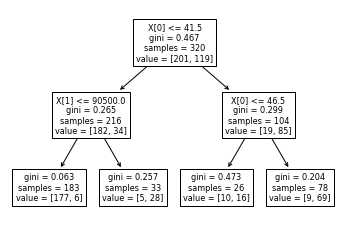

In [49]:
from sklearn import tree
tree.plot_tree(dt)